In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# データの読み込み (CIFAR-10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# データ拡張の設定
generator = ImageDataGenerator(
    rotation_range=90,        # 90°まで回転
    width_shift_range=0.3,    # 水平方向にランダムでシフト
    height_shift_range=0.3,   # 垂直方向にランダムでシフト
    channel_shift_range=70.0, # 色調をランダム変更
    shear_range=0.39,         # 斜め方向(pi/8まで)に引っ張る
    horizontal_flip=True,     # 垂直方向にランダムで反転
    vertical_flip=True        # 水平方向にランダムで反転
)

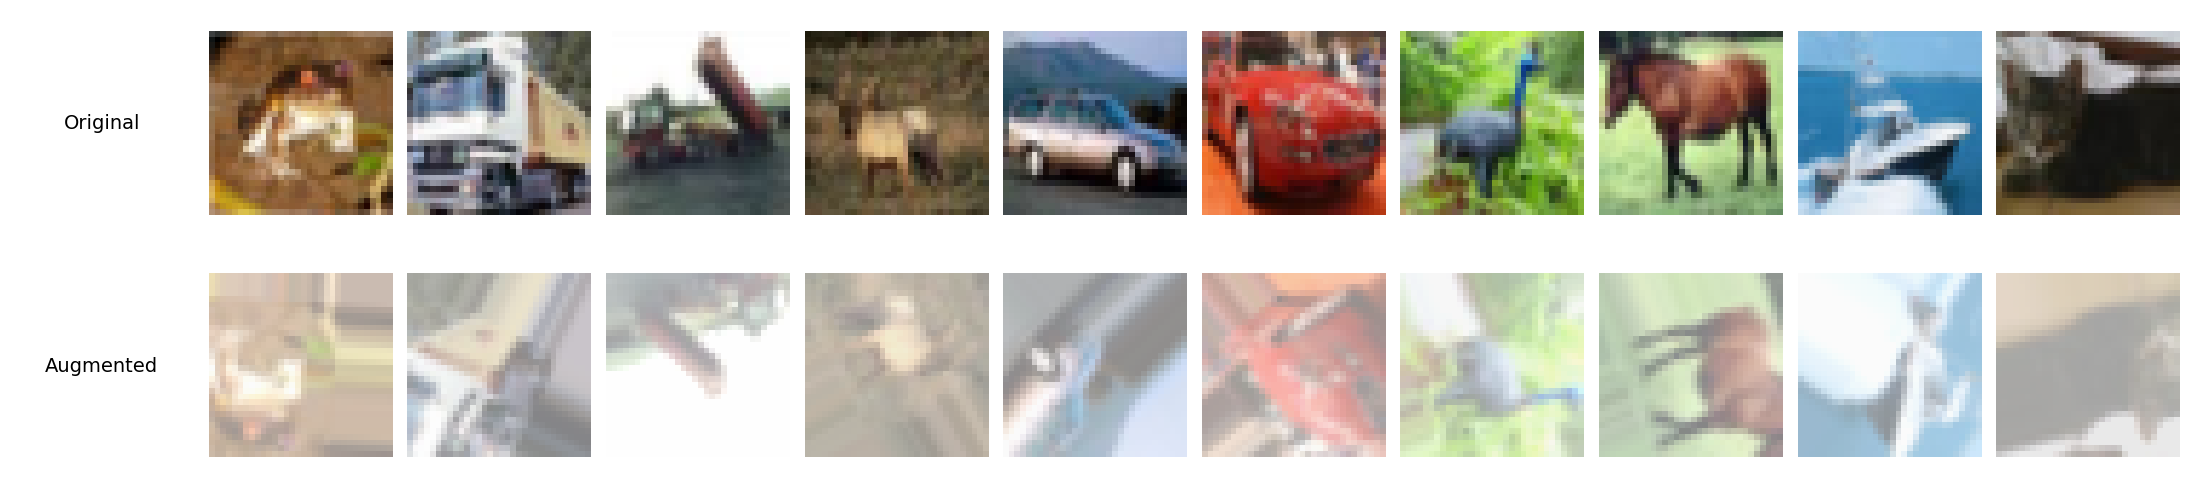

In [5]:
# 拡張画像を取得 (順番維持)
extension = generator.flow(X_train, shuffle=False)
X_batch = next(extension)

# 表示用に画素値を変換
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 描画開始 (2行×11列：先頭列にラベル画像)
fig, axes = plt.subplots(2, 11, figsize=(22, 5))

# 最初の10枚を対象
for i in range(10):
    # Original row
    axes[0, i + 1].imshow(X_train[i])
    axes[0, i + 1].axis('off')

    # Augmented row
    axes[1, i + 1].imshow(X_batch[i])
    axes[1, i + 1].axis('off')

# ラベル列 (左端)
axes[0, 0].text(0.5, 0.5, 'Original', fontsize=14, ha='center', va='center')
axes[1, 0].text(0.5, 0.5, 'Augmented', fontsize=14, ha='center', va='center')

# 枠線と軸を消す
axes[0, 0].axis('off')
axes[1, 0].axis('off')

# 余白調整と表示
plt.tight_layout()
plt.show()